In [1]:
#From your document, the project is: “NLP Sentiment Analysis on e-commerce customer reviews 
#(Amazon, etc.) and deploy the model using Streamlit / Flask / R Shiny.”

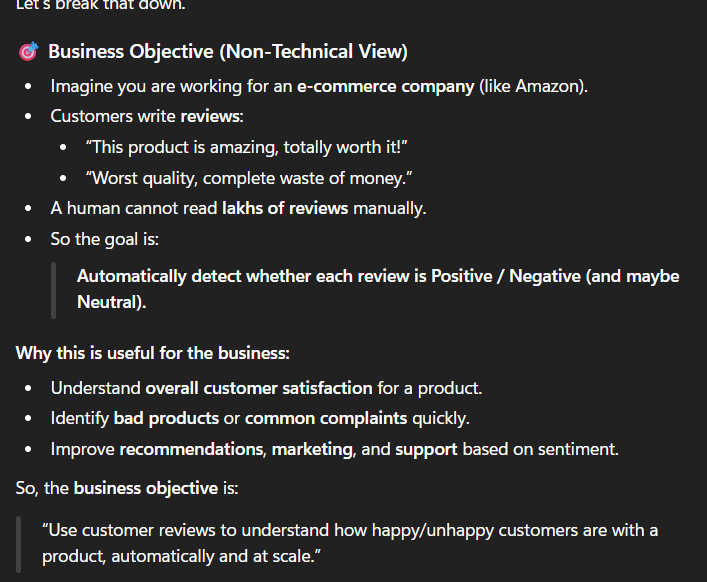

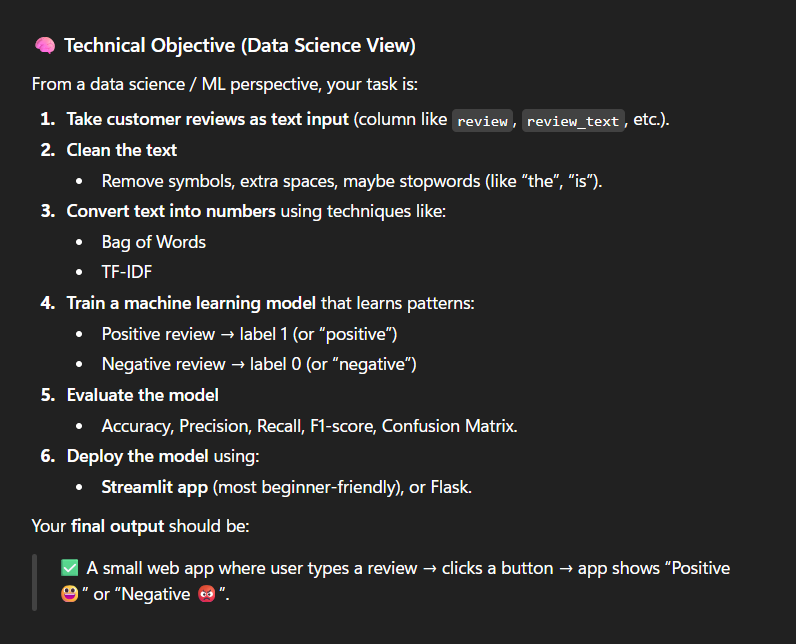

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Shashank\OneDrive\Desktop\dataset -P582 (1).csv")
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [3]:
df.shape

(1440, 3)

In [4]:
df.columns

Index(['title', 'rating', 'body'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [6]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
df.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# How many reviews for each rating (1 to 5)?
df['rating'].value_counts().sort_index()

# What this does:
# value_counts() → counts how many times each rating appears.
# sort_index() → orders them as 1,2,3,4,5.

rating
1    386
2    126
3    199
4    310
5    419
Name: count, dtype: int64

In [10]:
# We’ll convert:
# Rating 4 or 5 → "positive"
# Rating 1 or 2 → "negative"
# Rating 3 → "neutral"

# Function to map rating to sentiment
def map_rating_to_sentiment(r):
    if r >= 4:
        return "positive"
    elif r <= 2:
        return "negative"
    else:
        return "neutral"

# Create a new column 'sentiment'
df['sentiment'] = df['rating'].apply(map_rating_to_sentiment)

# Check first few rows
df[['rating', 'sentiment']].head()


,rating,sentiment
0,1,negative
1,3,neutral
2,4,positive
3,1,negative
4,1,negative


In [76]:
df['sentiment'].value_counts()

# This shows how many:
# "positive"
# "negative"
# "neutral"

sentiment
positive    729
negative    512
neutral     199
Name: count, dtype: int64

In [77]:
# Keep only positive & negative
df_binary = df[df['sentiment'] != 'neutral'].copy()

df_binary['sentiment'].value_counts(), df_binary.shape


(sentiment
 positive    729
 negative    512
 Name: count, dtype: int64,
 (1241, 5))

In [78]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['body'].apply(clean_text)
df[['body','clean_text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,body,clean_text
0,Very disappointed with the overall performance...,disappointed overall performance samsung
1,Camera quality is low,camera quality low
2,"Got the mobile on the launch date,Battery must...",got mobile launch date battery must appreciate...
3,1. It doesn't work with 5.0GHz WiFi frequency....,work ghz wifi frequency ghz old school camera ...
4,"Not worth buying....faulty software, poor disp...",worth buying faulty software poor display qual...


In [84]:
X = df_binary['clean_text']
y = df_binary['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((992,), (249,))

In [85]:
tfidf = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 2),   # unigrams + bigrams
    min_df=2,
    max_df=0.95
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((992, 4319), (249, 4319))

In [86]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

X_train_tfidf.shape, X_train_balanced.shape


((992, 4319), (1166, 4319))

In [87]:
y_train.value_counts(), y_train_balanced.value_counts()


(sentiment
 positive    583
 negative    409
 Name: count, dtype: int64,
 sentiment
 negative    583
 positive    583
 Name: count, dtype: int64)

In [88]:
svm_model = LinearSVC(C=0.5, class_weight='balanced')
svm_model.fit(X_train_balanced, y_train_balanced)


LinearSVC(C=0.5, class_weight='balanced')

In [89]:
y_pred = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9076305220883534

Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.85      0.88       103
    positive       0.90      0.95      0.92       146

    accuracy                           0.91       249
   macro avg       0.91      0.90      0.90       249
weighted avg       0.91      0.91      0.91       249


Confusion Matrix:
 [[ 88  15]
 [  8 138]]


In [91]:
import joblib

joblib.dump(svm_model, "sentiment_svm_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model & Vectorizer Saved Successfully!")


Model & Vectorizer Saved Successfully!


In [92]:
loaded_model = joblib.load("sentiment_svm_model.pkl")
loaded_tfidf = joblib.load("tfidf_vectorizer.pkl")

def predict_sentiment(text):
    clean = clean_text(text)
    vec = loaded_tfidf.transform([clean])
    return loaded_model.predict(vec)[0]

print(predict_sentiment("This phone is amazing!"))
print(predict_sentiment("Worst phone ever. Waste of money."))


positive
negative


In [ ]:
import streamlit as st
import joblib
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# ---------- Load model & vectorizer (with caching) ----------
@st.cache_resource
def load_artifacts():
    model = joblib.load("sentiment_svm_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")
    return model, vectorizer

model, tfidf = load_artifacts()

# ---------- Text cleaning (same logic as notebook) ----------
def clean_text(text: str) -> str:
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z ]', ' ', text)      # keep only letters + space
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

def predict_sentiment(review: str) -> str:
    clean = clean_text(review)
    vec = tfidf.transform([clean])
    pred = model.predict(vec)[0]
    return pred

# ---------- Streamlit UI ----------
st.set_page_config(page_title="Mobile Review Sentiment", page_icon="📱", layout="centered")

st.title("📱 Mobile Review Sentiment Analyzer")
st.write("Predict whether a customer review is **Positive** or **Negative**.")

user_input = st.text_area(
    "Enter a mobile product review:",
    height=150,
    placeholder="Example: The battery life is great and the camera is amazing!"
)

if st.button("🔍 Predict Sentiment"):
    if not user_input.strip():
        st.warning("Please type a review first.")
    else:
        label = predict_sentiment(user_input)

        if label == "positive":
            st.success("✅ Sentiment: **POSITIVE** 😊")
        else:
            st.error("❌ Sentiment: **NEGATIVE** 😠")

st.markdown("---")
st.caption("Model: TF-IDF + SMOTE + LinearSVC (binary sentiment)")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-11-17 17:32:41.345 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
